# Pandas lecture

Probably the most important tool for a data scientist in python is Pandas. Pandas is built on top of Numpy, therefore there will be many similarites and mechanics you already know. Where numpy made heavy use of the `ndarray`, most magic happens in the pandas `DataFrame`. Like other data frames like in R, the pandas `DataFrame` stores data in a rectangular grid that can be easily overviewed. Numpy is mostly used for numerical data, while pandas can be used for any tabular data. Pandas also has many useful functions! (really, a lot).

Pandas, Numpy and Matplotlib are the holy trio for data science with Python. They are fundamental libraries, and many other libraries are build on top of them.

Documentation can be found here:
https://pandas.pydata.org/pandas-docs/stable/index.html

![](pandas-data-structure.svg)

In [1]:
import numpy as np
import pandas as pd # common way to import pandas

![](../img/pandas_data_structure.png)

![](../img/dtypes_pandas.png)

With `Series` we can build one column of a `DataFrame`. A `Series` can also be seen as one feature of a dataset. They can easily be created from a list and are similar to 1-dimensional numpy arrays.

##  Series and Index


In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

`Series` can contain also strings or any other type of value.

In [3]:
t = pd.Series(["red", "green", "blue", "yellow", "purple", "black"])
t

0       red
1     green
2      blue
3    yellow
4    purple
5     black
dtype: object

We can also give the series a name:

In [4]:
t.name = "colors"
t

0       red
1     green
2      blue
3    yellow
4    purple
5     black
Name: colors, dtype: object

When we print out the `Series` we see that we get two columns of values. The right one is the one we speciefied, and the left one is the index. Default, the index is just the integer index. We can also give it another index.

In [5]:
u = pd.Series(np.arange(5), index=list("ABCDE")) #create a series from numpy array and custom index
u.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [6]:
u

A    0
B    1
C    2
D    3
E    4
dtype: int64

We can access the elements with the new specfied index

In [7]:
s[2], t[4], u["B"], u[1] # we can use both

(5.0, 'purple', 1, 1)

Next to creating your own index, pandas also offers multiple ways to create an `Index`.
Some can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html
Some examples:
- `DatetimeIndex` for dates
- `TimedeltaIndex` for time steps
- `CategeorialIndex` for defined categories

In [8]:
dates = pd.date_range('01/01-2021', periods=6) # index for 6 days starting with 2020-01-01
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
times = pd.timedelta_range(start=0, periods=6, freq="3s")
times

TimedeltaIndex(['00:00:00', '00:00:03', '00:00:06', '00:00:09', '00:00:12',
                '00:00:15'],
               dtype='timedelta64[ns]', freq='3S')

In [10]:
times_6H = pd.timedelta_range(start=0, periods=6, freq="6H")
times_6H

TimedeltaIndex(['0 days 00:00:00', '0 days 06:00:00', '0 days 12:00:00',
                '0 days 18:00:00', '1 days 00:00:00', '1 days 06:00:00'],
               dtype='timedelta64[ns]', freq='6H')

In [11]:
c = pd.CategoricalIndex(['a', 'b', 'c', 'a', 'b', 'c'])
c

CategoricalIndex(['a', 'b', 'c', 'a', 'b', 'c'], categories=['a', 'b', 'c'], ordered=False, dtype='category')

In [12]:
c_ord = pd.CategoricalIndex(['a', 'b', 'c'], ordered=True)
c_ord 

CategoricalIndex(['a', 'b', 'c'], categories=['a', 'b', 'c'], ordered=True, dtype='category')

In [13]:
c_ord.min(), c_ord.max() # if ordered, can have min max values

('a', 'c')

This will throw an error, because the index is not unique

In [14]:
v = pd.Series(np.arange(3), index=c_ord)
v["c"]

2

To be honest, mostly the normal `RangeIndex` (default integer index) is used, and values such as time can be stored as a feature in another `Series` itself. But it is useful to know that we can use different indexes.

We can also use categories when creating series

In [15]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

## DataFrames

Next is the key element `DataFrame`, which is similar to a 2-dimensional numpy array, storing data in a grid. There are multiple ways to create a `DataFrame`.

In [16]:
df = pd.DataFrame() # empty dataframe
df.dtypes, df

(Series([], dtype: object),
 Empty DataFrame
 Columns: []
 Index: [])

Like we have seen, a `DataFrame` consists of one or more `Series`. We can create them by joining them together.

In [17]:
s1 = pd.Series(np.random.rand(5))
s2 = pd.Series(np.random.rand(5))
print(s1) 

0    0.421271
1    0.366050
2    0.509165
3    0.513145
4    0.668679
dtype: float64


In [18]:
print(s2)

0    0.773668
1    0.007439
2    0.338220
3    0.285077
4    0.374881
dtype: float64


In [19]:
df = pd.concat([s1,s2])
print(df) 
print(type(df)) # actually still a series

0    0.421271
1    0.366050
2    0.509165
3    0.513145
4    0.668679
0    0.773668
1    0.007439
2    0.338220
3    0.285077
4    0.374881
dtype: float64
<class 'pandas.core.series.Series'>


In [20]:
df = pd.concat([s1,s2], axis=1)
df

,0,1
0,0.421271,0.773668
1,0.366050,0.007439
2,0.509165,0.338220
3,0.513145,0.285077
4,0.668679,0.374881


In [21]:
df = pd.DataFrame(np.random.randn(6, 4)) # from numpy array
df

,0,1,2,3
0,-0.608197,-1.806444,-1.208629,-0.058932
1,0.381243,-1.709185,1.228586,0.580636
2,-1.695735,-0.054744,-0.368803,-0.051634
3,0.613619,1.039193,-0.813195,-0.053872
4,-2.614329,0.832280,0.137272,-0.775893
5,0.256104,0.117043,-0.532866,-0.564794


When we print out a `DataFrame`, we see that now we have two indices, one for the rows and one for the columns. As with `Series`, we can specify those in the creation.

In [22]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD')) #row index as dates, and columns as category 
df

,A,B,C,D
2021-01-01,-0.897467,0.391830,0.408913,1.099529
2021-01-02,-0.384321,0.229057,-2.003927,1.544705
2021-01-03,-0.941076,-1.082363,-0.488380,-1.864798
2021-01-04,-0.971451,-0.084409,-0.063379,0.548746
2021-01-05,-0.413785,0.181694,0.681432,-0.486434
2021-01-06,-0.721730,-0.399511,1.100747,0.067565


`Series`, which already have a name, will keep it in the `DataFrame`.

In [23]:
u

A    0
B    1
C    2
D    3
E    4
dtype: int64

In [24]:
df_concat = pd.concat((t,u), axis=1)
df_concat # they dont have same index

,colors,0
0,red,NaN
1,green,NaN
2,blue,NaN
3,yellow,NaN
4,purple,NaN
5,black,NaN
A,NaN,0.0
B,NaN,1.0
C,NaN,2.0
D,NaN,3.0


In [25]:
u = u.reset_index(drop=True)
u

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [26]:
df_concat1 = pd.concat([t,u], axis=1)
df_concat1 

,colors,0
0,red,0.0
1,green,1.0
2,blue,2.0
3,yellow,3.0
4,purple,4.0
5,black,NaN


In [27]:
u = u.reindex_like(t)
u

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    NaN
dtype: float64

Unlike numpy arrays, `DataFrame` can have multiple types. For each columns entry, we have one type.

In [28]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

We can also create `DataFrames` from python dictionaries. We see, broadcasting is also available in pandas. Also, we can use ranges for values.

In [29]:
df2 = pd.DataFrame({'A': 1,
                    'B': pd.date_range(start="20130101", periods=4, freq="1d"), # we can also use ranges
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1,2013-01-01,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-03,1.0,3,test,foo
3,1,2013-01-04,1.0,3,train,foo


In [30]:
df2.dtypes # each column or Series has a different type

A             int64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

We also see, that broadcasting is applied if a value is not a container of some sort. Otherwise all entries for each `Series` must have the same length.

In [31]:
df2 = pd.DataFrame({'A': 1,
                    'B': pd.date_range(start="20130101", periods=4, freq="1d"), # we can also use ranges
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2
## will create error, because list are not the same length

,A,B,C,D,E,F
0,1,2013-01-01,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-03,1.0,3,test,foo
3,1,2013-01-04,1.0,3,train,foo


Once we have build a `DataFrame`, we can access its columns also over function call. (Built in function from IPython). The column name cannot have a whitespace!

In [32]:
df2.A

0    1
1    1
2    1
3    1
Name: A, dtype: int64

In [33]:
df2.E

0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]

### DataFrames from files

Since our data is usually stored in some file, pandas allow us to read many file types directly into a panda `DataFrame`. Very convienient! We also see, that pandas takes the headers as column index directly

In [34]:
student_performance_df = pd.read_csv('res/NewStudentPerformance.csv')
student_performance_df

,python score,ids,writing score,lunch,race/ethnicity,gender,reading score,parental level of education,math score,test preparation course
0,89,'6480',74,standard,group B,female,72,bachelor's degree,72,none
1,70,'7374',88,standard,group C,female,90,some college,69,completed
2,78,'1160',93,standard,group B,female,95,master's degree,90,none
3,90,'3404',44,free/reduced,group A,male,57,associate's degree,47,none
4,99,'9819',75,standard,group C,male,78,some college,76,none
...,...,...,...,...,...,...,...,...,...,...
995,70,'8533',95,standard,group E,female,99,master's degree,88,completed
996,96,'3840',55,free/reduced,group C,male,55,high school,62,none
997,70,'1925',65,free/reduced,group C,female,71,high school,59,completed
998,74,'4879',77,standard,group D,female,78,some college,68,completed


Just one line of code! wuhu!!

![](1_line_code.jpeg)

Pandas can also read and write to .xlsx (MS Excel) or .h5 (from the HDF group: https://www.hdfgroup.org/).
You might need some extra software installed for that!

In [35]:
df_excel = pd.read_excel('res/excel_example.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
df_excel

,Unnamed: 0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
...,...,...,...,...,...,...,...,...
995,996,Roma,Lafollette,Female,United States,34,15/10/2017,2654
996,997,Felisa,Cail,Female,United States,28,16/08/2016,6525
997,998,Demetria,Abbey,Female,United States,32,21/05/2015,3265
998,999,Jeromy,Danz,Male,United States,39,15/10/2017,3265


In [36]:
#Store the former csv files into excel
df.to_excel('NewStudentPerformance.xlsx',sheet_name="Sheet1")
df

,A,B,C,D
2021-01-01,-0.897467,0.391830,0.408913,1.099529
2021-01-02,-0.384321,0.229057,-2.003927,1.544705
2021-01-03,-0.941076,-1.082363,-0.488380,-1.864798
2021-01-04,-0.971451,-0.084409,-0.063379,0.548746
2021-01-05,-0.413785,0.181694,0.681432,-0.486434
2021-01-06,-0.721730,-0.399511,1.100747,0.067565


In [37]:
df_hdf = pd.read_hdf("res/hdf_example.h5",'df')
df_hdf

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


## DataFrame Basic Functions

Some basic functions for viewing the data.

In [38]:
df.head(2) # see 2 first items rows in df

,A,B,C,D
2021-01-01,-0.897467,0.391830,0.408913,1.099529
2021-01-02,-0.384321,0.229057,-2.003927,1.544705


In [39]:
df.tail(2) # see last two rows in df 

,A,B,C,D
2021-01-05,-0.413785,0.181694,0.681432,-0.486434
2021-01-06,-0.721730,-0.399511,1.100747,0.067565


In [40]:
df.columns, df.index

(Index(['A', 'B', 'C', 'D'], dtype='object'),
 DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
                '2021-01-05', '2021-01-06'],
               dtype='datetime64[ns]', freq='D'))

We can display some quick statistics with the function `describe()`.

In [41]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.721639,-0.127284,-0.060766,0.151552
std,0.264587,0.544068,1.102661,1.222869
min,-0.971451,-1.082363,-2.003927,-1.864798
25%,-0.930174,-0.320735,-0.382130,-0.347934
50%,-0.809599,0.048642,0.172767,0.308156
75%,-0.490772,0.217217,0.613302,0.961834
max,-0.384321,0.391830,1.100747,1.544705


`describe()` only works for numerical dtypes. 

In [42]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


We can also rearange and sort our DataFrames quickly.

In [43]:
df.T # Transprosing, just like in numpy

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,-0.897467,-0.384321,-0.941076,-0.971451,-0.413785,-0.721730
B,0.391830,0.229057,-1.082363,-0.084409,0.181694,-0.399511
C,0.408913,-2.003927,-0.488380,-0.063379,0.681432,1.100747
D,1.099529,1.544705,-1.864798,0.548746,-0.486434,0.067565


In [44]:
df2.sort_index(axis=1, ascending=False) # Sorting by an axis:

,F,E,D,C,B,A
0,foo,test,3,1.0,2013-01-01,1
1,foo,train,3,1.0,2013-01-02,1
2,foo,test,3,1.0,2013-01-03,1
3,foo,train,3,1.0,2013-01-04,1


In [45]:
df.sort_values(by='B') #sort by values in a column

,A,B,C,D
2021-01-03,-0.941076,-1.082363,-0.488380,-1.864798
2021-01-06,-0.721730,-0.399511,1.100747,0.067565
2021-01-04,-0.971451,-0.084409,-0.063379,0.548746
2021-01-05,-0.413785,0.181694,0.681432,-0.486434
2021-01-02,-0.384321,0.229057,-2.003927,1.544705
2021-01-01,-0.897467,0.391830,0.408913,1.099529


We can find unique elements in a Series with pd.unique()

In [46]:
pd.unique(df_excel.Country)

array(['United States', 'Great Britain', 'France'], dtype=object)

### DataFrame Indexing

We can use the known indexing methods from python and numpy, but pandas also offer optimized function to select data.

In [47]:
df['A'] 

2021-01-01   -0.897467
2021-01-02   -0.384321
2021-01-03   -0.941076
2021-01-04   -0.971451
2021-01-05   -0.413785
2021-01-06   -0.721730
Freq: D, Name: A, dtype: float64

In [48]:
df.A

2021-01-01   -0.897467
2021-01-02   -0.384321
2021-01-03   -0.941076
2021-01-04   -0.971451
2021-01-05   -0.413785
2021-01-06   -0.721730
Freq: D, Name: A, dtype: float64

In [49]:
df[0:3] # slice rows

,A,B,C,D
2021-01-01,-0.897467,0.391830,0.408913,1.099529
2021-01-02,-0.384321,0.229057,-2.003927,1.544705
2021-01-03,-0.941076,-1.082363,-0.488380,-1.864798


In [50]:
df['20210101':'20210104'] # slice rows with custom index (including last one!!)

,A,B,C,D
2021-01-01,-0.897467,0.391830,0.408913,1.099529
2021-01-02,-0.384321,0.229057,-2.003927,1.544705
2021-01-03,-0.941076,-1.082363,-0.488380,-1.864798
2021-01-04,-0.971451,-0.084409,-0.063379,0.548746


We can also use selection with the function `loc()`

In [51]:
df_excel.columns

Index(['Unnamed: 0', 'First Name', 'Last Name', 'Gender', 'Country', 'Age',
       'Date', 'Id'],
      dtype='object')

In [52]:
df_excel.index

RangeIndex(start=0, stop=1000, step=1)

In [53]:
df_excel.loc[0:5]

,Unnamed: 0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
2,3,Philip,Gent,Male,France,36,21/05/2015,2587
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554


**Unlike python or numpy slicing, both start and end are included!!**

In [54]:
df_excel.loc[0:5,'First Name':'Country']

,First Name,Last Name,Gender,Country
0,Dulce,Abril,Female,United States
1,Mara,Hashimoto,Female,Great Britain
2,Philip,Gent,Male,France
3,Kathleen,Hanner,Female,United States
4,Nereida,Magwood,Female,United States
5,Gaston,Brumm,Male,United States


We can still use normal slicing by integers with `iloc`.

In [55]:
df_excel.iloc[0:5,1:6]

,First Name,Last Name,Gender,Country,Age
0,Dulce,Abril,Female,United States,32
1,Mara,Hashimoto,Female,Great Britain,25
2,Philip,Gent,Male,France,36
3,Kathleen,Hanner,Female,United States,25
4,Nereida,Magwood,Female,United States,58


### Boolean Indexing

Just like numpy, we can use boolean indexing to select data.

In [56]:
df_hdf.Product.unique()

array(['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla'],
      dtype=object)

In [57]:
df_hdf[(df_hdf.Product == 38)][:10] # first 10 people with age 38

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year


We can also specify multiple conditions 

In [58]:
df_excel[(df_excel.Country != "France")][:10]

,Unnamed: 0,First Name,Last Name,Gender,Country,Age,Date,Id
0,1,Dulce,Abril,Female,United States,32,15/10/2017,1562
1,2,Mara,Hashimoto,Female,Great Britain,25,16/08/2016,1582
3,4,Kathleen,Hanner,Female,United States,25,15/10/2017,3549
4,5,Nereida,Magwood,Female,United States,58,16/08/2016,2468
5,6,Gaston,Brumm,Male,United States,24,21/05/2015,2554
6,7,Etta,Hurn,Female,Great Britain,56,15/10/2017,3598
7,8,Earlean,Melgar,Female,United States,27,16/08/2016,2456
8,9,Vincenza,Weiland,Female,United States,40,21/05/2015,6548
9,10,Fallon,Winward,Female,Great Britain,28,16/08/2016,5486
10,11,Arcelia,Bouska,Female,Great Britain,39,21/05/2015,1258


use `isin()` to filter stuff out, e.g. check for multiple values.

In [59]:
df1 = df.copy()
df1['E'] = list("TUVXYZ")
df1

df1[df1['E'].isin(['U', 'Z'])]

,A,B,C,D,E
2021-01-02,-0.384321,0.229057,-2.003927,1.544705,U
2021-01-06,-0.721730,-0.399511,1.100747,0.067565,Z


#### Boolean Indexing with List Comprehension

In [61]:
df_hdf[[x.startswith("F") for x in df_hdf.Country]]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.00,37980.00,18990.0,18990.00,2014-06-01,6,June,2014
22,Midmarket,France,Paseo,None,549.0,10,15,8235.0,0.00,8235.00,5490.0,2745.00,2013-09-01,9,September,2013
32,Enterprise,France,Velo,None,1804.0,120,125,225500.0,0.00,225500.00,216480.0,9020.00,2014-02-01,2,February,2014
40,Midmarket,France,VTT,None,2178.0,250,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,Government,France,Paseo,High,293.0,10,20,5860.0,879.00,4981.00,2930.0,2051.00,2014-12-01,12,December,2014
683,Midmarket,France,Velo,High,2826.0,120,15,42390.0,6358.50,36031.50,28260.0,7771.50,2014-05-01,5,May,2014
684,Enterprise,France,Velo,High,663.0,120,125,82875.0,12431.25,70443.75,79560.0,-9116.25,2014-09-01,9,September,2014
694,Government,France,VTT,High,293.0,250,20,5860.0,879.00,4981.00,2930.0,2051.00,2014-12-01,12,December,2014


In [64]:
df_hdf.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

#### Boolean Indexing with Lambda Function

In [68]:
criterion = df_hdf[" Sales"].map(lambda x: x > 10000)
criterion

0       True
1       True
2       True
3       True
4       True
       ...  
695     True
696     True
697    False
698    False
699     True
Name:  Sales, Length: 700, dtype: bool

### Assigning Values

To set values, we can use the `at()` function to set values by label, or `iat()` when setting values by position.

In [ ]:
df.at[dates[0], 'A'] = 0
df

We can also use numpy arrays to set values

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))
df

### Missing data

Sometimes, your dataset is not fully filled, and values are missing. Panda has some functions for that.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) #reindex datafram and add empty column E
df1

In [ ]:
df1.loc[dates[0]:dates[1], 'E'] = 1 # set some values to 1 in E

In [ ]:
df1.dropna(how='any') # drop all rows with nan

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) #reindex datafram and add empty column E
df1.loc[dates[0]:dates[1], 'E'] = 1,2 # set some values to 1 in E
df1

In [ ]:
df1.fillna(df1.mean())

### Statistics

Very similar to numpy, we can use mean(), max(), min() etc.

In [ ]:
df.mean()

In [ ]:
df.std()

### MultiIndex and Grouping

Until now, the `DataFrame` we have created all only had two dimensions. By creating a `MultiIndex`, we can technically add a dimension to our `DataFrame`, and therefore display more complex data. The `MultiIndex` also helps to sort the data and give better overview to you `DataFrame`. Pandas offers a couple functions to create a `MultiIndex`.

In [80]:
# we want to create a multi index for cars and index them after brand and type
cars_index = [("Mercedes", "Sport"), 
             ("Mercedes", "Family"),
             ("BMW", "Sport"), 
             ("BMW", "Family"),
             ("VW", "Sport"), 
             ("VW", "Family")
            ]

multi_index = pd.MultiIndex.from_tuples(cars_index, names=["brand","type"])

# some car features
color = pd.Series(["green", "red", "blue", "yellow", "green", "yellow"], name="color", index=multi_index)
speed = pd.Series(np.random.randint(50,100,6), name="speed", index=multi_index)

df_cars = pd.concat((color, speed), axis=1)
df_cars

color  speed
brand    type                 
Mercedes Sport    green     85
         Family     red     91
BMW      Sport     blue     73
         Family  yellow     96
VW       Sport    green     75
         Family  yellow     85

In [83]:
# faster: create multiindex from all possible products (but you get all products)

multi_index = pd.MultiIndex.from_product((("Mercedes", "BMV", "VW", "Audi"), ("Sport", "Family", "SUV")))
multi_index

MultiIndex([('Mercedes',  'Sport'),
            ('Mercedes', 'Family'),
            ('Mercedes',    'SUV'),
            (     'BMV',  'Sport'),
            (     'BMV', 'Family'),
            (     'BMV',    'SUV'),
            (      'VW',  'Sport'),
            (      'VW', 'Family'),
            (      'VW',    'SUV'),
            (    'Audi',  'Sport'),
            (    'Audi', 'Family'),
            (    'Audi',    'SUV')],
           )

We can also set a `MultiIndex` for the columns.

In [85]:
# split cars into Fast and Slow
multi_columns = pd.MultiIndex.from_product((("Fast", "Slow"), ("Weight", "PS")))
multi_columns

MultiIndex([('Fast', 'Weight'),
            ('Fast',     'PS'),
            ('Slow', 'Weight'),
            ('Slow',     'PS')],
           )

In [90]:
# put all together
df_cars = pd.DataFrame(np.random.randint(0,high=100, size=(12,4)), index=multi_index, columns=multi_columns)
df_cars

Fast       Slow    
                Weight  PS Weight  PS
Mercedes Sport      33  31     57  63
         Family     79  55     20  39
         SUV        59  84     54   2
BMV      Sport      41  15     67   8
         Family     50  64     31  37
         SUV        55  55     42  46
VW       Sport      69  75     10  39
         Family     31  47     56  75
         SUV        35  19     69  88
Audi     Sport      73  15      7  68
         Family     19  80     23  84
         SUV        73   0     90  52

Many times we also have an existing dataset and want to imply set a new index. For that we can use the `set_index` method and use multiple index.

In [94]:
df_hdf.set_index(["Year", "Country"]).sort_index()# not the columns size of the df has been decreased, since we used them as the new index

Segment   Product Discount Band  \
Year Country                                                              
2013 Canada                          Enterprise   Montana          None   
     Canada                          Government     Paseo          None   
     Canada                           Midmarket     Paseo          None   
     Canada                          Enterprise      Velo          None   
     Canada                          Government      Velo           Low   
...                                         ...       ...           ...   
2014 United States of America        Enterprise  Amarilla          High   
     United States of America  Channel Partners  Amarilla          High   
     United States of America  Channel Partners     Paseo          High   
     United States of America  Channel Partners      Velo          High   
     United States of America  Channel Partners       VTT          High   

                               Units Sold  Manufacturing Price  Sale Price  \
Year Country                                                                 
2013 Canada                         345.0                    5         125   
     Canada                        1725.0                   10         350   
     Canada                        2152.0                   10          15   
     Canada                         345.0                  120         125   
     Canada                        2092.0                  120           7   
...                                   ...                  ...         ...   
2014 United States of America      2844.0                  260         125   
     United States of America      2914.0                  260          12   
     United States of America       914.0                   10          12   
     United States of America       914.0                  120          12   
     United States of America      1806.0                  250          12   

                               Gross Sales  Discounts      Sales      COGS  \
Year Country                                                                 
2013 Canada                        43125.0       0.00   43125.00   41400.0   
     Canada                       603750.0       0.00  603750.00  448500.0   
     Canada                        32280.0       0.00   32280.00   21520.0   
     Canada                        43125.0       0.00   43125.00   41400.0   
     Canada                        14644.0     146.44   14497.56   10460.0   
...                                    ...        ...        ...       ...   
2014 United States of America     355500.0   49770.00  305730.00  341280.0   
     United States of America      34968.0    4895.52   30072.48    8742.0   
     United States of America      10968.0    1645.20    9322.80    2742.0   
     United States of America      10968.0    1645.20    9322.80    2742.0   
     United States of America      21672.0    3250.80   18421.20    5418.0   

                                  Profit       Date  Month Number Month Name  
Year Country                                                                  
2013 Canada                      1725.00 2013-10-01            10    October  
     Canada                    155250.00 2013-11-01            11   November  
     Canada                     10760.00 2013-12-01            12   December  
     Canada                      1725.00 2013-10-01            10    October  
     Canada                      4037.56 2013-11-01            11   November  
...                                  ...        ...           ...        ...  
2014 United States of America  -35550.00 2014-05-01             5        May  
     United States of America   21330.48 2014-10-01            10    October  
     United States of America    6580.80 2014-12-01            12   December  
     United States of America    6580.80 2014-12-01            12   December  
     United States of America   13003.20 2014-05-01             5        May  

[700 r

Indexing still works very similar, since we are only selecting rows and columns. but now, for each level in the `MultiIndex`, we can index each level. If we are indexing multiple levels, we need to use parantheses.

In [129]:
df_cars.loc[("Mercedes","Sport"), "Fast"] # select level 0 (brand) and level 1 (type)

Weight    33
PS        31
Name: (Mercedes, Sport), dtype: int64

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error:

In [116]:
df_cars.loc[(:,"Sport")] # try to select all sport cars

SyntaxError: invalid syntax (<ipython-input-116-bab93e88a2b6>, line 1)

In [131]:
df_cars

Fast       Slow    
                Weight  PS Weight  PS
Mercedes Sport      33  31     57  63
         Family     79  55     20  39
         SUV        59  84     54   2
BMV      Sport      41  15     67   8
         Family     50  64     31  37
         SUV        55  55     42  46
VW       Sport      69  75     10  39
         Family     31  47     56  75
         SUV        35  19     69  88
Audi     Sport      73  15      7  68
         Family     19  80     23  84
         SUV        73   0     90  52

A better way in this context is to use an `IndexSlice` object, which Pandas provides for precisely this situation. For example:

In [141]:
idx = pd.IndexSlice
df_cars.loc[idx[:,"SUV"], idx["Fast",:]]

Fast    
             Weight  PS
Mercedes SUV     59  84
BMV      SUV     55  55
VW       SUV     35  19
Audi     SUV     73   0

With `groupby` we can quickly split and combine data on some criteria. We ca also apply a function the each group independently. 

In [69]:
df = pd.DataFrame({'A': ['x', 'x', 'y', 'x',
                         'x', 'y', 'y', 'x'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,x,one,-0.080352,-0.625791
1,x,one,1.222643,0.625986
2,y,two,1.255763,-0.706797
3,x,three,1.157662,0.222569
4,x,two,-0.350252,0.878716
5,y,two,0.351713,1.123320
6,y,one,0.207168,2.448693
7,x,three,1.037434,1.418496


In [70]:
df.groupby('A').sum() # group them together and applying sumation on grous # B is dropped, because not numerical

,C,D
A,,
x,2.987135,2.519975
y,1.814644,2.865217


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [ ]:
df.groupby(['A', 'B']).sum()

We can also use `groupby()` iterate over groups. 

In [95]:
for group in df_hdf.groupby(df_hdf.Country):
    # group is a tuple, where first value is the string name of that group, and the second the data frame
    print(group[0])
    

Canada
France
Germany
Mexico
United States of America


## Plotting with Pandas

Matplotlib and Panda go hand in hand, and makes plotting really easy.

In [146]:
import matplotlib.pyplot as plt

In [151]:
index=pd.date_range('1/1/2000', periods=1000)


df = pd.DataFrame(np.random.randn(1000, 4), index=index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.795031,0.180241,-0.535663,1.047235
2000-01-02,-0.768289,-0.017419,-0.776516,0.686787
2000-01-03,0.022728,-1.289549,-1.555873,-0.014739
2000-01-04,-0.793651,-1.603548,-0.786098,-0.171395
2000-01-05,0.349839,-2.620608,-0.163068,1.179432
...,...,...,...,...
2002-09-22,14.982363,2.689678,12.819771,15.080765
2002-09-23,15.788966,2.933754,13.170235,16.599625
2002-09-24,14.958476,2.133041,11.518486,16.586756
2002-09-25,15.256844,3.237570,11.831594,15.846829


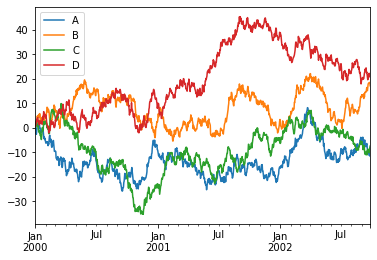

In [148]:

df.plot()
plt.show()

In [ ]:
df_excel

In [ ]:
df_excel.hist(column="Age")
plt.show()

In [152]:
df_test = pd.read_csv("res/NewStudentPerformance.csv")
df_test

,python score,ids,writing score,lunch,race/ethnicity,gender,reading score,parental level of education,math score,test preparation course
0,89,'6480',74,standard,group B,female,72,bachelor's degree,72,none
1,70,'7374',88,standard,group C,female,90,some college,69,completed
2,78,'1160',93,standard,group B,female,95,master's degree,90,none
3,90,'3404',44,free/reduced,group A,male,57,associate's degree,47,none
4,99,'9819',75,standard,group C,male,78,some college,76,none
...,...,...,...,...,...,...,...,...,...,...
995,70,'8533',95,standard,group E,female,99,master's degree,88,completed
996,96,'3840',55,free/reduced,group C,male,55,high school,62,none
997,70,'1925',65,free/reduced,group C,female,71,high school,59,completed
998,74,'4879',77,standard,group D,female,78,some college,68,completed


In [153]:
df_lunch = df_test[df_test.lunch == "standard"].groupby("race/ethnicity")[["reading score", "math score"]].mean()

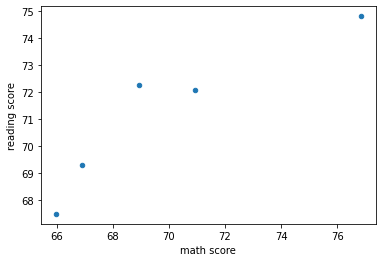

In [162]:
df_lunch.plot(x="math score", 
              y="reading score",
              kind="scatter")
plt.show()

In [ ]:
df_lunch_standard.plot()
plt.show()

In [ ]:
labels = []

for group_name, group_df in df_hdf.groupby(df_hdf.Country):
    group_df.plot()

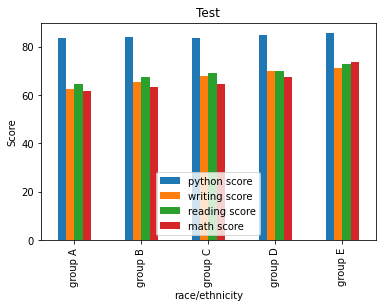

In [150]:
df_students = pd.read_csv("res/NewStudentPerformance.csv")
scores = [x for x in df_students.columns if "score" in x]
df_scores_grouped_lunch = df_students.groupby("race/ethnicity")[scores].mean()
ax = df_scores_grouped_lunch.plot(kind="bar")
ax.set_ylabel("Score")
plt.title("Test")
plt.show()